# 웹데이터

2016-09-12 Mon 06

## 1.1 학습내용

### 1.1.1 목표

* 웹데이터를 프로그램으로 가져올 수 있다.
* 가져온 웹데이터를 정리하여 분석가능한 형식으로 만들 수 있다.
* dom, xpath, css.selector 데이터를 추출할 수 있다.

### 1.1.2 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기
    * 태그값 가져오기
    * 웹페이지 파싱 search, regex, BeautifulSoup
* 웹데이터-2: 웹파일 가져와서 자료구조에 넣기
    * uci 기계학습데이터
* 웹데이터-3: wiki에서 'python'으로 검색해서 http url출력하기
    * REST get query
    * 구글에서 검색하기
    * 위키에서 검색하기
* 웹데이터-4: 한국 포털사이트에서 노래 제목을 검색
    * 검색 scraping - ?key=value&...
* 웹데이터-5: 프로야구 기록 scraping
    * kbo 
    * kbreport.com
* 웹데이터-6: 프리미어리그
* 웹데이터-11: freegeoip.net

### 1.1.3 연습

* 웹데이터-7: 신문
* 웹데이터-8: Reddit
* 웹데이터-9: Tripadvisor
* 웹데이터-10: 코스피200 데이터 가져오기


## 1.2 웹으로 나가기

* 클라이언트와 서버
    * 자신의 컴퓨터 에서(클라이언트) 웹브라우저를 열어서 웹주소를 요청하면
    * 네트워크를 통해 서버에 요청하고, 웹페이지를 반환
    * 반환된 페이지는 html이라서, 사람이 그대로 읽기가 불편
    * 웹브라우저를 사용하면 html을 보기 좋게 보여준다 (html을 태그를 스타일에 따라 브라우저에 표현한다, 이를 parsing이라고 한다).

* 웹데이터는 인터넷에 저장된 데이터로서, html로 표현되고 http통신으로 교환.
    * http (HpyerText Transfer Protocol)는 웹프로토콜 (서로 데이터를 주고 받는 약속)
    * socket 80번 포트
    * request(s) vs. response(s)
* 여기서는 웹데이터를 가져오는 단계를 해 본다.
    * 데이터가져오기 - 웹에서 크롤링
        * 가져오는 방식
            * web scraping - 자동, api아닌 방식 (api가 없는 경우 사용)
            * api - 자동 (xml, json으로 반환)
        * 절차
            * 웹사이트에 요청(request)
                * GET, POST 방식 - urlstring의 구조 이해하기
            * 웹사이트 결과(repsponse) 가져오기
                * 결과 처리 (parser)
                * 반복하기 - 다음 response는 어떻게 가져오나
    * 가져온 데이터는 정리, 분석, 시각화가 필요하다.

In [1]:
import iplantuml

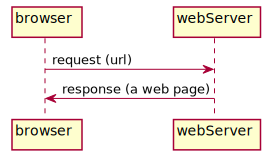

In [2]:
%%plantuml
@startuml
browser -> webServer:request (url)
webServer -> browser:response (a web page)
@enduml

* library
    * urllib - handles opening and reading URLs
    * httplib - handles http requests, urllib내부에서 사용하고 있슴.
    * requests - API를 사용할 때
    * HTMLParser - parser <- comes with lxml
    * BeautifulSoup - Python으로 구현된 parser
    ```
    from bs4 import BeautifulSoup
    ```
    * curl - Terminal에서 사용하는 명령어
    * lxml - is written in C and thus faster than bs. xml and html parser
    * regex
    * scrapy
        * full framework
        * use pipelines
        * use for a big project. (for a small project, use requests,lxml or BeautifulSoup

구분 | 라이브러리 | 설명
-----|-----|-----
웹데이터 가져오기 | urllib, requests, curl | 
웹데이터 파싱 | HTMLParser, BeautifulSoup, lxml, reqex | 문자열 또는 xml, json을 파싱
프레임워크 | scrapy (java nutch, crawler4j) | 큰 프로젝트에 사용


## 1.3 crawling

* URL에서 데이터를 읽어서
* 필요한 데이터 항목을 추출해서
* 엑셀, json, xml이나 원하는 형식으로 저장
* 이를 프로그램으로 자동화하는 도구

* HTML DOM (Document Object Model)
* XML xpath
* Simple API for XML (SAX)
* 데이터의 법적인 문제 - crawl데이터의 저작권법

### 1.3.1 uri

* URI Uniform Resource Identifier 특정자원을 지칭하는 고유명사
* URI 가운데 가장 많이 쓰이는 것이 인터넷주소 url (Uniform Resource Locator)
* 형식
    * 
    ```
    scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
    ```
    * 로컬 html 파일보기 (file://host/path/to/html)
        * 위 URI 형식을 지켜서 페이지를 열어야 한다.
        * 한글은 meta charset을 utf-8로 지정한다.
    * 웹페이지 열어보기

In [53]:
%%writefile mypage.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Writing mypage.html


* 로컬에 저장된 파일을 읽어오는 uri를 구성한다.

In [54]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'mypage.html')
webbrowser.open(myuri)
# uri형식을 지키지 않으면 안된다.
# webbrowser.open('mypage.html')

True

### 한글

* 한글은 meta charset을 정의해 준다.

In [3]:
%%writefile mypage.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting mypage.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 원격의 uri를 구성한다.

In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.3.2 params

* query string은 다음과 같이 구성한다.
    ```
    http://example.com/over/there?name=ferret
    ```
* web form을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, field=value
    * 구분자는 & (또는 세미콜론 ;)
    ```
    field1=value1&field2=value2&field3=value3...
    ```

In [9]:
import urllib
params = urllib.urlencode({"a": 4, "b": 20, "c": 2016, "d": 6, "e": 30, "f": 2016, "s": "^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


### 1.3.3 regex

* 정규식 regular expression은 문자열로 표현한 정규표현으로, 패턴매칭에 사용한다.
* 정규식을 사용하면 복잡한 패턴을 단순하게 처리

### 1.3.4 dom

* Document Object Model (DOM)
* HTML, XHTML, XML 문서를 계층구조인 트리구조로 만들어, 각 노드를 오브젝트로 사용하는 API.

#### Chrome개발자 도구 사용하기

* xpath(또는 selector)를 찾는 방법
    * Chrome을 열어서 > 보기 > 개발자정보 > 개발자도구 -> element
       * html tag를 누르면 맨 앞 ...가 생김
            * 이것을 누르면 팝업메뉴 > copy > xpath(또는 selector)
* 검증하기
    * console
        * xpath
        ```
        $x('xpath')
        ```
        
        * HTML DOM querySelector() Method
        ```
        $('selector')
        ```
        
        * HTML DOM querySelectorAll() Method
        ```
        $$('selector all')
        ```

* dom의 querySelector()를 사용한다.
* dom의 getElementById()를 사용한다.

In [5]:
%%HTML
<html>
<body>

<h2 class="my">Turn this into blue</h2>

<button onclick="myFunction()">Click</button>

<script>
function myFunction() {
    document.querySelector(".my").style.backgroundColor = "blue";
}
</script>

</body>
</html>

* HTML javascript DOM
    * style of a <p> element

In [20]:
%%HTML
<html>
<body>

<p id="p2">Hello World!</p>

<script>
document.getElementById("p2").style.color = "RED";
</script>

<p>Hello World turned into RED!</p>

</body>
</html>

### 1.3.5 xpath

* xpath 표현

Expression | 설명
---------|----------
nodename | Selects all nodes with the name "nodename"
/ | Selects from the root node
// | Selects nodes in the document from the current node that match the selection no matter where they are
. | Selects the current node
.. | Selects the parent of the current node
@ | Selects attributes
\* | all


* xpath 사용예

xpath선택 | 결과
----------|----------
```$x('/html')``` | ```<html>...</html>```
```$x('/html/body')``` | ```<body>...</body>```
```$x('/html/body/div')``` | ```<div>...</div>```
```$x('/html/body/div/h1')``` | ```<h1>Example Domain</h1>```
```$x('/html/body/div/p')``` | ```<p>...</p>, <p>...</p>```
```$x('/html/body/div/p[1]')``` | ```<p>...</p>```
```$x('/html/body/div/p[2]')``` | ```<p>...</p>```


#### xml 파싱

* 위키에서 가져온 XML

In [3]:
%%writefile my.xml
<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>

Writing my.xml


In [4]:
f=open('my.xml')
myxml=f.read()
f.close()

In [5]:
print myxml

<?xml version="1.0" encoding="utf-8"?>
<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


* 단계1: 라이브러리를 사용할 수 있게 가져온다.

    ```
    import xml.etree.ElementTree as ET
    ```

* 단계2: 파일을 읽어서 파싱하고, 트리를 생성한다.

    ```
    tree=ET.parse('my.xml')
    ```

* 단계3: 트리를 탐색한다.
    * 'namespace' localname으로 가져옴.
    ```
    root=tree.getroot()
    root.getiterator():
    ```

In [1]:
import iplantuml

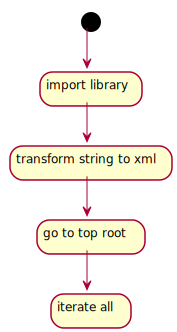

In [3]:
%%plantuml
@startuml
(*)--> "import library"
--> "transform string to xml"
--> "go to top root"
--> "iterate all"
@enduml

In [7]:
import xml.etree.ElementTree as ET
tree=ET.parse('my.xml')
root=tree.getroot()
print root

<Element 'wikimedia' at 0x7f53384dde10>


* 파일이 아닌 메모리에서 읽어 오는 방식

In [8]:
import xml.etree.ElementTree as ET
root=ET.fromstring(myxml)
for i in root.getiterator():
    print i.tag, i.attrib

wikimedia {}
projects {}
project {'name': 'Wikipedia', 'launch': '2001-01-05'}
editions {}
edition {'language': 'English'}
edition {'language': 'German'}
edition {'language': 'French'}
edition {'language': 'Polish'}
edition {'language': 'Spanish'}
project {'name': 'Wiktionary', 'launch': '2002-12-12'}
editions {}
edition {'language': 'English'}
edition {'language': 'French'}
edition {'language': 'Vietnamese'}
edition {'language': 'Turkish'}
edition {'language': 'Spanish'}


* 단계1: 라이브러리 가져온다.
    ```
    import lxml
    ```

* 단계2: 파싱. 트리구조로 메모리에 올림.
    ```
    tree=lxml.etree.parse('my.xml')
    ```

* 단계3: 트리를 탐색한다.
    ```
    tree.iterparse():
    ```

In [12]:
from lxml import etree

tree=lxml.etree.parse('my.xml')
root=tree.getroot()

* 메모리에서 읽어오기

In [13]:
from lxml import etree
import StringIO
tree=lxml.etree.parse(StringIO.StringIO(myxml))
context=lxml.etree.iterparse(StringIO.StringIO(myxml))

In [14]:
for action,elem in context:
    if not elem.text:
        text="None"
    else:
        text=elem.text
    print elem.tag+"=>"+text

edition=>en.wikipedia.org
edition=>de.wikipedia.org
edition=>fr.wikipedia.org
edition=>pl.wikipedia.org
edition=>es.wikipedia.org
editions=>
        
project=>
      
edition=>en.wiktionary.org
edition=>fr.wiktionary.org
edition=>vi.wiktionary.org
edition=>tr.wiktionary.org
edition=>es.wiktionary.org
editions=>
        
project=>
      
projects=>
    
wikimedia=>
  


* xpath
    * /wikimedia/projects/project/@name
        * /Wikimedia/projects/project/@name
    * /Wikimedia//editions
    * /wikimedia/projects/project/editions/edition[@language='English']/text()
        * text of all edition elements where language attribute is equal to English).
    * /wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()
        * text of all edition elements that exist under project element with a name attribute of Wikipedia

In [11]:
nodes = tree.xpath("/wikimedia/projects/project/@name")
print len(nodes)

2


In [62]:
for node in nodes:
    print node

Wikipedia
Wiktionary


In [21]:
nodes = tree.xpath("//editions")
print len(nodes)

2


In [64]:
nodes = tree.xpath("/wikimedia/projects/project/editions/edition[@language='English']/text()")
print len(nodes)

2


In [65]:
for node in nodes:
    print node

en.wikipedia.org
en.wiktionary.org


In [66]:
nodes = tree.xpath("/wikimedia/projects/project[@name='Wikipedia']/editions/edition/text()")
print len(nodes)

5


In [67]:
for node in nodes:
    print node

en.wikipedia.org
de.wikipedia.org
fr.wikipedia.org
pl.wikipedia.org
es.wikipedia.org


### 1.3.6 css selectors

* [css selectors](http://www.w3schools.com/cssref/css_selectors.asp)
* 설치
    ```
    sudo apt-get install libxml2-dev libxslt1-dev
    pip install lxml cssselect
    ```

In [5]:
import lxml.html
from lxml.cssselect import CSSSelector


In [17]:
# construct a CSS Selector -> 
sel = CSSSelector('wikimedia.')
# Apply the selector to the DOM tree.
results = sel(tree)
print results

[<Element wikimedia at 0x7f09a6e925f0>]


In [18]:
# print the HTML for the first result.
match = results[0]
print lxml.html.tostring(match)

<wikimedia>
  <projects>
    <project name="Wikipedia" launch="2001-01-05">
      <editions>
        <edition language="English">en.wikipedia.org</edition>
        <edition language="German">de.wikipedia.org</edition>
        <edition language="French">fr.wikipedia.org</edition>
        <edition language="Polish">pl.wikipedia.org</edition>
        <edition language="Spanish">es.wikipedia.org</edition>
      </editions>
    </project>
    <project name="Wiktionary" launch="2002-12-12">
      <editions>
        <edition language="English">en.wiktionary.org</edition>
        <edition language="French">fr.wiktionary.org</edition>
        <edition language="Vietnamese">vi.wiktionary.org</edition>
        <edition language="Turkish">tr.wiktionary.org</edition>
        <edition language="Spanish">es.wiktionary.org</edition>
      </editions>
    </project>
  </projects>
</wikimedia>


In [6]:
myhtml="""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>"""
print myhtml

<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>


In [9]:
html = lxml.html.fromstring(myhtml)

In [10]:
print lxml.html.tostring(html)

<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>&#50504;&#45397;&#54616;&#49901;&#45768;&#44620;</h1>
<p>&#50724;&#45720;&#51008; &#54532;&#47196;&#44536;&#47000;&#48141; &#54616;&#45716; &#45216;...</p>
<p>Today we do programming...</p>
</body>
</html>


In [11]:
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('p')
# Apply the selector to the DOM tree.
results = sel(html)
print results

[<Element p at 0x7f8514076f18>, <Element p at 0x7f8514076f70>]


In [12]:
# get the text out of all the results
data = [result.text for result in results]
for x in data:
    print x

오늘은 프로그래밍 하는 날...
Today we do programming...


In [ ]:
* chrom javascript console에서 selector를 복사해서 사용한다.

In [13]:
html = lxml.html.fromstring(myhtml)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('body > p:nth-child(2)')
# Apply the selector to the DOM tree.
results = sel(html)
print results

[<Element p at 0x7f8514076c00>]


In [14]:
html = lxml.html.fromstring(myhtml)
#tree=lxml.etree.parse('myhtml')
# construct a CSS Selector -> 
sel = CSSSelector('body > h1')
# Apply the selector to the DOM tree.
results = sel(html)
print results

[<Element h1 at 0x7f851407a3c0>]


In [15]:
# get the text out of all the results
data = [result.text for result in results]
for x in data:
    print x

안녕하십니까


### 1.3.7 scrapy

* 설치
    * openssl
    ```
    pip install scrapy
    ```

* Scrapy shell을 이용한 문서 구조 파악

* 크롤링 프로젝트 절차
    * 단계1: 프로젝트 생성
        * 프로젝트를 생성할 디렉토리로 이동
            ```
            cd mypjt
            scrapy startproject myspider
            ```
            * 1 scrapy 프레임워크를 사용
            * 2 startproject 프로젝트를 생성
            * 3 myspider 프로젝트 명칭
            * 4 크롤링 대상 도메인
        * 생성내용
            ```
            mypjt
            ├── myspider
            │   ├── __init__.py
            │   ├── items.py
            │   ├── pipelines.py
            │   ├── settings.py
            │   └── spiders
            │       └── __init__.py
            └── scrapy.cfg
            ```

    * 단계2: item 정의
        ```
        cd myspider/
        vim items.py
        ```
        * describe the things you want to collect from a target web page.
    * 단계3: Spider
        ```
        cd spiders/
        vim mys.py
        myspideritem class
        ```
        * 1 명칭 new project name + my item class
        * 2 start_url에서 시작
        * 3 parse()함수에서 원하는 항목을 추출
    * 단계4: 테스트
        ```
        scrapy crawl 
        ```
    * 단계5: 저장
        * pipeline을 이용해서 database에 저장할 수 있다.
        ```
        scrapy crawl craig -o items.csv -t csv
        ```


```
scrapy shell http://stackoverflow.com
>>> response.url
>>> response.headers
>>> response.xpath('//title')
```

## 웹데이터-1: python.org 페이지를 크롤링해서 http url 출력하기

* 정적인 페이지 가져오기
* 사용자가 웹브라우저 주소창에 url을 입력하고 웹페이지 요청
* urllib vs urllib2 (py4inf 12장)
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) url lib.error로 나눔.ㅠ
* urllib2.urlopen 
    * GET 또는 POST 방식으로 원격 url (html, 이미지, 파일 등)을 엶

In [19]:
import urllib
response = urllib.urlopen('http://python.org/')
html = response.read()
print response.info()
print len(html)

Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: SAMEORIGIN
X-Clacks-Overhead: GNU Terry Pratchett
Content-Length: 47427
Accept-Ranges: bytes
Date: Fri, 19 Aug 2016 23:17:50 GMT
Via: 1.1 varnish
Age: 621
Connection: close
X-Served-By: cache-nrt6135-NRT
X-Cache: HIT
X-Cache-Hits: 1
Vary: Cookie
Public-Key-Pins: max-age=600; includeSubDomains; pin-sha256="WoiWRyIOVNa9ihaBciRSC7XHjliYS9VwUGOIud4PB18="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="5C8kvU039KouVrl52D0eZSGf4Onjo4Khs8tmyTlV3nU="; pin-sha256="lCppFqbkrlJ3EcVFAkeip0+44VaoJUymbnOaEUk7tEU="; pin-sha256="TUDnr0MEoJ3of7+YliBMBVFB4/gJsv5zO7IxD9+YoWI="; pin-sha256="x4QzPSC810K5/cMjb05Qm4k3Bw5zBn4lTdO/nEW/Td4=";
Strict-Transport-Security: max-age=63072000; includeSubDomains

47427


In [9]:
import re
#p=re.compile('http://.+"')
p=re.compile('href="(http://.*?)"')
res=p.findall(html)
print "http url은 몇 개?",len(res)
for item in res:
    print item

http url은 몇 개? 44
http://www.ie6countdown.com/
http://browsehappy.com/
http://www.google.com/chromeframe/?redirect=true
http://plus.google.com/+Python
http://www.facebook.com/pythonlang?fref=ts
http://twitter.com/ThePSF
http://wiki.python.org/moin/Languages
http://python.org/dev/peps/
http://planetpython.org/
http://pyfound.blogspot.com/
http://pycon.blogspot.com/
http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator
http://blog.python.org
http://feedproxy.google.com/~r/PythonInsider/~3/_sGRwFhJK4s/python-2711-release-candidate-1.html
http://feedproxy.google.com/~r/PythonInsider/~3/a6zwstMbRrg/python-350-has-been-released.html
http://feedproxy.google.com/~r/PythonInsider/~3/D-XkdrMEtE0/python-350-release-candidate-4-released.html
http://feedproxy.google.com/~r/PythonInsider/~3/wxPYPcIYdqo/python-350-release-candidate-3-released.html
http://feedproxy.google.com/~r/PythonInsider/~3/a1yIx-RxQW4/python-3.html
http://www.djangoproject.com/
http://www.pylonsproject

### 태그 값을 가져오기

* library를 사용하면 보다 간편하게 가져올 수 있지만, 배운 regex를 이용해보자.
* h1 태그
* p 태그

In [10]:
import re
p=re.compile('<h1>(.*?)</h1>')
h1tags=p.findall(html)
for i in h1tags:
    print i

Functions Defined
Compound Data Types
Intuitive Interpretation
Quick &amp; Easy to Learn
All the Flow You&rsquo;d Expect


In [11]:
import re
p=re.compile('<p>(.*?)</p>')
ptags=p.findall(html)
for i in ptags:
    print i

<strong>Notice:</strong> While Javascript is not essential for this website, your interaction with the content will be limited. Please turn Javascript on for the full experience. 
<strong>Notice:</strong> Your browser is <em>ancient</em> and <a href="http://www.ie6countdown.com/">Microsoft agrees</a>. <a href="http://browsehappy.com/">Upgrade to a different browser</a> or <a href="http://www.google.com/chromeframe/?redirect=true">install Google Chrome Frame</a> to experience a better web.
The core of extensible programming is defining functions. Python allows mandatory and optional arguments, keyword arguments, and even arbitrary argument lists. <a href="//docs.python.org/3/tutorial/controlflow.html#defining-functions">More about defining functions in Python&nbsp;3</a>
Lists (known as arrays in other languages) are one of the compound data types that Python understands. Lists can be indexed, sliced and manipulated with other built-in functions. <a href="//docs.python.org/3/tutorial/int

### BeautifulSoup

* 태그를 파싱하는 라이브러리
* 설치
    * 윈도우 아나콘다창 또는 맥/리눅스 Terminal에서
    
    ```sudo pip install BeautifulSoup```
* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기


In [14]:
from BeautifulSoup import *
soup=BeautifulSoup(html)
strongtags=soup('strong')
for tag in strongtags:
    print tag

<strong>Notice:</strong>
<strong><small>A</small> A</strong>
<strong>relaunched community-run job board</strong>


* 추가

In [ ]:
from urllib import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj = BeautifulSoup(html)
for link in bsObj.findAll("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])

* xpath로 해보기
    * lxml로 html을 파싱해서 자료 가져오기 (위에서 읽어온 html 변수를 사용)

In [20]:
from lxml import etree
_html = etree.HTML(html)
result = etree.tostring(_html, pretty_print=True, method="html")
print(result)

<html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" content="True">
    <meta name="format-detection" content="telephone=no">
    <meta http-equiv="cleartype" content="on">
    <meta http-equiv="imagetoolbar" content="false">

    <script src="/static/js/libs/modernizr.js"></script>

    <link href="/static/stylesheets/style.css" rel="s

In [21]:
nodes = _html.xpath('//*[@href]')
print len(nodes)

206


In [32]:
for node in nodes:
    print node.attrib

{'href': '//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js', 'rel': 'prefetch'}
{'href': '/static/stylesheets/style.css', 'type': 'text/css', 'rel': 'stylesheet', 'title': 'default'}
{'media': 'not print, braille, embossed, speech, tty', 'href': '/static/stylesheets/mq.css', 'type': 'text/css', 'rel': 'stylesheet'}
{'href': '/static/favicon.ico', 'type': 'image/x-icon', 'rel': 'icon'}
{'href': '/static/apple-touch-icon-144x144-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '144x144'}
{'href': '/static/apple-touch-icon-114x114-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '114x114'}
{'href': '/static/apple-touch-icon-72x72-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '72x72'}
{'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon-precomposed'}
{'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon'}
{'href': '/static/humans.txt', 'rel': 'author'}
{'href': '#content', 'titl

* Chrom javascript console에서 확인해보자
```
$x('//*[@href]')
```

## 웹데이터-2: 웹파일을 가져와서 자료구조에 넣기

* uci 기계학습 데이터 파일 읽기
* 로컬 파일을 읽는 것과 비교
* 전체 문자 수는 25,437
* 데이터는 300행 x 28열

In [1]:
import urllib2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
res=urllib2.urlopen(url)
html = res.read()
res.close()
print len(html)

Date: Sun, 29 Nov 2015 20:56:36 GMT
Server: Apache/2.2.15 (CentOS)
Last-Modified: Fri, 17 Jul 1992 11:24:37 GMT
ETag: "22e9fc62-635d-286fd43dfa740"
Accept-Ranges: bytes
Content-Length: 25437
Connection: close
Content-Type: text/plain; charset=UTF-8

25437


In [55]:
lines=html.splitlines()
data=[]
for line in lines:
    data.append(line.split())
print len(data), len(data[0])
print data[0]

300 28
['2', '1', '530101', '38.50', '66', '28', '3', '3', '?', '2', '5', '4', '4', '?', '?', '?', '3', '5', '45.00', '8.40', '?', '?', '2', '2', '11300', '00000', '00000', '2']


### 데이터 확인

* 모든 300행에대해 28개 컬럼이 있는지
* 처음 20개만 3번째 컬럼 평균내보기

In [56]:
for i in range(0,len(data)):
    if len(data[i]) != len(data[0]):
        print "wrong size at", i

In [57]:
for i in range(0,20):
    print data[i][3]

38.50
39.2
38.30
39.10
37.30
?
37.90
?
?
38.30
38.10
39.10
37.20
38.00
38.2
37.60
?
37.50
37.60
39.4


In [52]:
sum=0
cnt=0
for i in range(0,20):
    val=data[i][3]
    if val is '?':
        print i,"None"
    else:
        sum+=float(val)
        cnt+=1
        print i,val, sum
average=float(sum/cnt)
print "count={0} sum={1} average={2:2.2f}".format(cnt,sum,average)

0 38.50 38.5
1 39.2 77.7
2 38.30 116.0
3 39.10 155.1
4 37.30 192.4
5 None
6 37.90 230.3
7 None
8 None
9 38.30 268.6
10 38.10 306.7
11 39.10 345.8
12 37.20 383.0
13 38.00 421.0
14 38.2 459.2
15 37.60 496.8
16 None
17 37.50 534.3
18 37.60 571.9
19 39.4 611.3
count=16 sum=611.3 average=38.21


## 웹데이터-3: wiki에서 'python'으로 검색해서 http url 출력하기

* 문제 6-1에서는 정적 페이지를 읽었고, 여기서는 검색어를 사용한 request
* urllib을 사용해서 처리하면 오류, 웹브라우저를 열어서 하면 ok
* 이유는 header를 설정하지 않아서 그렇다.

In [58]:
from urllib import urlopen
keyword='python'
resp = urlopen('https://www.google.com/search?q='+keyword)
html=resp.read()
len(html)

5503

In [59]:
import re
p=re.compile('.*(error).*')
print p.search(html).group(1)

error


In [61]:
import webbrowser
webbrowser.open('http://www.google.com/search?q=python')

True

### headers

* user agent
    * Python에서 사용하는 기본 User Agent는 'a User-Agent header of urllib/VVV' (urllib 버전코드)
    * 이런 User Agent를 사용하면 에러가 발생할 수 있슴.
    
Headers | example from my browser
---|---
User-Agent | Python-urllib/1.17


* 형식
    ```Mozilla/[version] ([system and browser information]) [platform] ([platform details]) [extensions]```
    * Safari on the iPad
    ```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B40```
    * Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
    * (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
    * AppleWebKit/531.21.10: The platform the browser uses.
    * (KHTML, like Gecko): Browser platform details.
    * Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.
* user agent 확인
https://www.whatismybrowser.com/detect/what-is-my-user-agent

* 리눅스 Firefox의 User Agent 예
```Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0```
* 맥 Safari의 User Agent 예
```Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7```

In [4]:
import requests

resp = requests.head("http://www.google.com")
print resp.status_code, resp.text, resp.headers

302  {'content-length': '261', 'server': 'GFE/2.0', 'location': 'http://www.google.co.kr/?gfe_rd=cr&ei=QXFbVo7AHImT8QeKz5jADQ', 'cache-control': 'private', 'date': 'Sun, 29 Nov 2015 21:42:25 GMT', 'content-type': 'text/html; charset=UTF-8'}


In [8]:
import urllib2
class HeadRequest(urllib2.Request):
     def get_method(self):
         return "HEAD"

response = urllib2.urlopen(HeadRequest("http://google.com/index.html"))
print response.info()
print response.geturl()

Date: Sun, 29 Nov 2015 21:44:39 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=EUC-KR
P3P: CP="This is not a P3P policy! See http://www.google.com/support/accounts/bin/answer.py?hl=en&answer=151657 for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: PREF=ID=1111111111111111:FF=0:TM=1448833479:LM=1448833479:V=1:S=p_NrWPRByVhLzhLn; expires=Thu, 31-Dec-2015 16:02:17 GMT; path=/; domain=.google.co.kr
Set-Cookie: NID=74=WP02QYAAMdigzDodTKVwk0EA5cCFy8cO9z90rymqmZgg6DAxQyArVTUXq9PO1K-qbYxgBtEBzdHEijPc0HZWjAULt4zSsulDOaBOMVrBslr13TWTBTegJ8t_QTbzl79oQLKwG_hhYB7hlZ8sV7dQ-gDZ4R-tQTl_6TbHzpQ; expires=Mon, 30-May-2016 21:44:39 GMT; path=/; domain=.google.co.kr; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close

http://www.google.co.kr/index.html?gfe_rd=cr&ei=xnFbVpmhOIXN8gec5rLwBw


In [35]:
# 파이썬에서 사용하는 기본 User Agent
from urllib import URLopener
URLopener.version

'Python-urllib/1.17'

* defining my own UA

In [40]:
# 연습으로 자신의 User Agent 설정
from urllib import FancyURLopener
class MyOpener(FancyURLopener):
    version = 'My new User-Agent'
MyOpener.version

'My new User-Agent'

In [41]:
# 리눅스 Firefox User Agent 예
# 맥 Safari User Agent 예
class MyOpener(FancyURLopener):
    #version = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'
    version = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'
MyOpener.version

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7'

In [ ]:
myopener = MyOpener()
page = myopener.open('http://www.google.com/search?q=python')
html=page.read()

In [47]:
f=open('mygoogle.html','w')
f.write(html)
f.close()
import webbrowser
mygoogle='file://'+'localhost'+os.path.join(os.getcwd(), 'mygoogle.html')
print mygoogle
webbrowser.open(mygoogle)

file://localhost/home/jsl/Code/git/bb/p2/mygoogle.html


True

In [43]:
import re

p=re.compile('href="(http://.*?)"')
#p=re.compile('.*href.*')
res=p.findall(html)
print len(res)
for item in res:
    print item[:100]

10
http://www.google.co.kr/preferences?hl=ko
http://www.google.co.kr/history/optout?hl=ko
http://webcache.googleusercontent.com/search?q=cache:Fvb7Gz_c4rwJ:https://www.python.org/+&amp;cd=2&
http://webcache.googleusercontent.com/search?q=cache:LmCkGjF_ShkJ:https://wikidocs.net/6+&amp;cd=7&a
http://webcache.googleusercontent.com/search?q=cache:OL25IRr7kSMJ:https://ko.wikipedia.org/wiki/%25E
http://webcache.googleusercontent.com/search?q=cache:3wRBXLyvECcJ:https://en.wikipedia.org/wiki/Pyth
http://webcache.googleusercontent.com/search?q=cache:yuJHfXirRuQJ:https://www.codecademy.com/ko/trac
http://webcache.googleusercontent.com/search?q=cache:VieTLWvITEcJ:https://www.codecademy.com/learn/p
http://learnpythonthehardway.org/book/ex1.html
http://webcache.googleusercontent.com/search?q=cache:XKefHRMkyrUJ:learnpythonthehardway.org/book/ex1


In [6]:
googleurl = 'https://www.google.com/search'
keyValues = {'q' : 'python programming tutorials'}
request = urllib.urlencode(keyValues)
print request
request = request.encode('utf-8') # data should be bytes
print request
req = urllib2.Request(url, request)
print req.get_method
resp = urllib2.urlopen(req)
resp = myopener.open(req)
html = resp.read()

NameError: name 'urllib' is not defined

### wiki에서 읽기

In [14]:
import urllib
keyword='Albert_Einstein'
keyword='Python (programming language)'
s = urllib.urlopen('http://en.wikipedia.org/w/index.php?action=raw&title='+keyword).read()
#print s.find('Python is a widely used general-purpose')
print s[:5000]


{{About|the programming language|the genus and other uses|Python (disambiguation)}}
{{Use dmy dates|date=August 2015}}
{{Infobox programming language
|name                   = Python
|logo                   = Python logo and wordmark.svg
|logo_size              = 260px
|paradigm               = [[multi-paradigm programming language|multi-paradigm]]: [[object-oriented programming|object-oriented]], [[imperative programming|imperative]], [[functional programming|functional]], [[procedural programming|procedural]], [[reflective programming|reflective]]
|year                   = {{Start date and age|df=yes|1991}}
|designer               = [[Guido van Rossum]]
|developer              = [[Python Software Foundation]]
|latest_release_version = 3.5.0 /<br>{{Start date|df=yes|2015|09|13}}<ref>{{cite web |url=https://docs.python.org/3/whatsnew/3.5.html |title=Python 3.5.0 |publisher=Python Software Foundation |accessdate=13 September 2015}}</ref><br>2.7.10 /<br>{{Start date|df=yes|2015|05|23}}<r

### 위키에서 css.selector

In [ ]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests

r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
# build the DOM Tree
tree = lxml.html.fromstring(r.text)
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

* 오른쪽 버튼 > copy > copy selector

In [ ]:
# construct a CSS Selector -> 
sel = CSSSelector('#mw-content-text > div:nth-child(1)')
# Apply the selector to the DOM tree.
results = sel(tree)
print results

In [1]:
# print the HTML for the first result.
match = results[0]
print lxml.html.tostring(match)

# get the href attribute of the first result
print match.get('href')

# print the text of the first result.
print match.text

# get the text out of all the results
data = [result.text for result in results]

## 웹데이터-4: 한국 포털사이트에서 노래제목을 검색

In [66]:
import urllib
keyword='비오는'
f = urllib.urlopen("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
mydata = f.read();

In [76]:
pos = mydata.find("트랙 리스트")
if (pos>0):
    pos = mydata.find("_title title NPI=", pos);
    pos = mydata.find("title=",pos+20)
    pos2 = mydata.find("\"", pos+8)
    print "---",mydata[pos+7:pos2]
print len(mydata)

import re
p=re.compile('title=".*비.?오는.*"')
#res=p.search(data)
res=p.findall(mydata)
for item in res:
    print item

--- 비 오는 거리
128336
title="검색어 입력" value="비오는" maxlength="50" accesskey="s"
title="비오는날" alt="비오는날"
title="비오는 금요일" alt="비오는 금요일"
title="비 오는 거리" ><span class="ellipsis"
title="1집 비오는 거리" class="_album NPI=a:album,r:1,i:682"><span class="ellipsis"
title="비오는 날 수채화" ><span class="ellipsis"
title="비오는 날 수채화 1 OST" class="_album NPI=a:album,r:2,i:33001"><span class="ellipsis"
title="비오는 날엔 막걸리 (Feat. 신승열)" ><span class="ellipsis"
title="비오는 날엔 막걸리" class="_album NPI=a:album,r:3,i:596117"><span class="ellipsis"
title="비 오는 날 (Rainy Day)" ><span class="ellipsis"
title="비 오는 날 (Rainy Day)" class="_album NPI=a:album,r:4,i:596538"><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="유ㄹish.1 - 비오는 거리" class="_album NPI=a:album,r:5,i:208754"><span class="ellipsis"
title="비 오는 이런 날에" ><span class="ellipsis"
title="비 오는 이런 날에" class="_album NPI=a:album,r:6,i:560089"><span class="ellipsis"
title="비오는 거리" ><span class="ellipsis"
title="비오는 압구정" ><span class="ellipsis"
title="비오는 압구정" 

## 웹데이터-5: 프로야구 기록 scraping


* 한글은 unicode로 패턴 찾음.
    * u'타자'
* 야구데이터는 검색엔진을 이용하며, 검색결과가 정적인 HTML로 반환되지 않는 듯함. 그래서 결과를 받을 수 없슴.

In [8]:
import urllib2
import requests
urlperson='http://www.kbreport.com/player/list?key=이대호'
urlbase="http://www.kbreport.com/leader/main?"
url1="rows=20&order=oWAR&orderType=DESC&"
url2="teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0"
urlbaseball=urlbase+url1+url2
print urlbaseball
data=requests.get(urlbaseball).text
#data=requests.get(urlperson).text
print data[6000:7000]

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0
"><li>팀순위</li></a>
					<a href="awards.html"><li id="nav3">명예의전당</li></a>
					<a href="/statDic/main"><li id="nav4">STAT Dic</li></a>
					<a href="/event/hitProbabilityPerGame"><li>이벤트 STAT</li></a>
					 -->
				</ul>
			</div>
		</div><!-- .nav end -->
		<div class="top-score-box">
		<div class="top-score">
				<div class="top-score-top">
					<div class="tst-1">
						<span class="tst-date">2014.6.24</span>
						<span class="tst-day">화</span>
					</div>
					<div class="tst-2">
						<div class="tst-vs-score">
							<p class="tst-stadium">잠실</p>
							<p class="tst-team-1"><span class="teamName">삼성</span></p>
							<span class="tst-team-1-score">7</span>
							<span class="tst-dash">-</span>
							<span class="tst-team-2-score">6</span>
							<p class="tst-team-2"><span class="teamName">롯데</span></p

In [9]:
print data.find('top-score-top')
print data.find('top-score end')

#import re
#p=re.compile('NC\w+')
#res=re.search('<title>', data)
#res=re.search(u'타자.+', data)
#res=re.search(u'야구.통계.+', data)
#print res.group()

#data.encode('utf-8')
#print data
#from BeautifulSoup import BeautifulSoup
#BeautifulSoup(data)

6340
8353


In [12]:
mydata=data[6340:8353+len('top-score end')]
import re
p=re.compile(u'.승.+')
#p=re.compile(u'.두산.')
#res=p.search(data)
res=p.findall(mydata)
print res
for item in res:
    print item
#print res.group()
#findall?
#print res.groups

[u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r']
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>


In [6]:
import requests
urlkorbase='http://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx'
data=requests.get(urlkorbase).text
#print data

# 국가통게
kosis='http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=A#SubCont'
data=requests.get(urlkorbase).text
print len(data)

78734
